The data has been preprocssesed in the Tirgul.

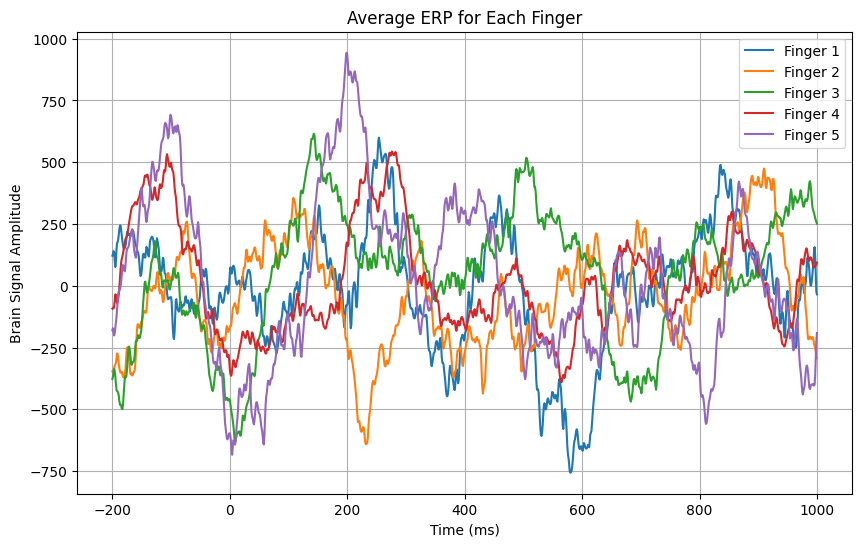


The matrix as a df:


,0,1,2,3,4,5,6,7,8,9,...,1191,1192,1193,1194,1195,1196,1197,1198,1199,1200
0,121.585938,128.078125,140.179688,135.187500,101.851562,75.820312,97.250000,147.015625,173.390625,176.007812,...,14.507812,38.531250,65.179688,95.734375,136.234375,156.531250,120.414062,42.812500,-23.765625,-34.859375
1,-346.252101,-345.361345,-342.798319,-333.630252,-323.084034,-317.974790,-311.294118,-293.008403,-273.924370,-275.781513,...,-213.831933,-208.747899,-207.613445,-218.100840,-234.462185,-243.378151,-252.436975,-267.579832,-281.789916,-293.697479
2,-377.333333,-367.991667,-346.641667,-336.325000,-344.958333,-365.325000,-396.366667,-421.033333,-426.291667,-428.466667,...,348.725000,325.716667,309.966667,302.316667,295.416667,284.133333,273.916667,265.883333,258.375000,251.183333
3,-92.447368,-89.542105,-91.615789,-84.073684,-58.947368,-34.610526,-37.057895,-58.847368,-71.147368,-65.352632,...,106.505263,98.752632,87.463158,74.931579,74.200000,79.394737,79.300000,81.105263,87.200000,93.636842
4,-180.351351,-171.594595,-185.486486,-201.135135,-192.472973,-170.932432,-151.108108,-126.689189,-96.783784,-61.797297,...,-399.918919,-399.878378,-397.675676,-399.310811,-404.148649,-400.108108,-364.783784,-294.054054,-222.864865,-191.216216


In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

def calc_mean_erp(trial_points, ecog_data):

    """
    Calculate and plot the mean ERP for each finger movement.
    
    Args:
    trial_points (DataFrame): DataFrame with columns containing the starting point, peak point, and finger number.
    ecog_data (DataFrame): DataFrame with one column representing the time-series brain signal.
    
    Returns:
    np.ndarray: A 5x1201 matrix where each row corresponds to a finger's average ERP.
    """
    
    # Assign proper column names
    trial_points.columns = ['start', 'peak', 'finger']
    # Convert trial_points to integer type
    trial_points = trial_points.astype({'start': int, 'peak': int, 'finger': int})


    # Define constants
    pre_event_duration = 200  # ms before the start of movement
    post_event_duration = 1000  # ms after the start of movement
    total_samples = pre_event_duration + post_event_duration + 1  # 1201 samples
    
    # Initialize matrix for averaged ERPs (5 fingers, 1201 time points)
    fingers_erp_mean = np.zeros((5, total_samples))
    
    for finger_id in range(1, 6):  # Loop through each finger
        # Filter trials for the current finger
        finger_trials = trial_points[trial_points['finger'] == finger_id]
        
        # Collect all brain signal segments for the current finger
        finger_signals = []
        for _, row in finger_trials.iterrows():
            start_index = int(row['start']) - pre_event_duration
            end_index = int(row['start']) + post_event_duration + 1
            
            # Extract the segment if within bounds
            if 0 <= start_index < len(ecog_data) and 0 <= end_index <= len(ecog_data):
                signal_segment = ecog_data[start_index:end_index].values.flatten()
                finger_signals.append(signal_segment)
        
        # Compute the average ERP for this finger if signals exist
        if finger_signals:
            fingers_erp_mean[finger_id - 1, :] = np.mean(finger_signals, axis=0)
    
    # Plot the ERPs
    time_axis = np.linspace(-200, 1000, total_samples)  # Time axis in ms
    plt.figure(figsize=(10, 6))
    for finger_id in range(1, 6):
        plt.plot(time_axis, fingers_erp_mean[finger_id - 1, :], label=f'Finger {finger_id}')
    plt.title('Average ERP for Each Finger')
    plt.xlabel('Time (ms)')
    plt.ylabel('Brain Signal Amplitude')
    plt.legend()
    plt.grid()
    plt.show()
    
    return fingers_erp_mean

# Read the csv files 
trial_points = pd.read_csv('/Users/ohadgonen/Desktop/Neuroscience/Year 2/1st semester/Advenced programming in Python/מטלות בית/mini_project2/mini_project_2_data/events_file_ordered.csv', dtype={'start': int, 'peak': int, 'finger': int})
ecog_data = pd.read_csv('/Users/ohadgonen/Desktop/Neuroscience/Year 2/1st semester/Advenced programming in Python/מטלות בית/mini_project2/mini_project_2_data/brain_data_channel_one.csv', header=None, names=["ECOG_Signal"])
    
# Call the function
fingers_erp_mean = calc_mean_erp(trial_points, ecog_data)

# Display the results 5x1201 matrix as a df
fingers_erp_mean_df = pd.DataFrame(fingers_erp_mean)
print("\nThe matrix as a df:") 
fingers_erp_mean_df
